### 导入数据

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/titanic/train.csv',index_col=0)

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 数据预处理

In [5]:
#简化数据
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


数据类型转换：将性别转换为0-1变量类型

In [10]:
def f1(x):
    if x == 'male':
        return 1
    else:
        return 0

In [7]:
df['Sex'] = df['Sex'].apply(f1)

In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,S
2,1,1,0,38.0,1,0,71.2833,C
3,1,3,0,26.0,0,0,7.9250,S
4,1,1,0,35.0,1,0,53.1000,S
5,0,3,1,35.0,0,0,8.0500,S


由于Embarked列有缺失值，通过seaborn进行可视化，发现S值最多，所以通过S值进行缺失值填充。

In [16]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

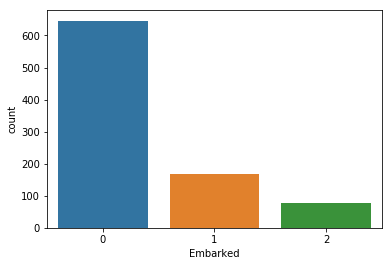

In [33]:
sns.countplot(x="Embarked",data=df)

In [34]:
df['Embarked'] = df['Embarked'].fillna('S')

In [35]:
labels = df['Embarked'].unique().tolist()
df['Embarked'] = df['Embarked'].apply(lambda n: labels.index(n))
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,1
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,0


年龄字段也有缺失值，我们通过绘制直方图，发现基本呈正态分布，于是使用平均值来填充缺失值。

In [36]:
df['Age'].isnull().sum()

0

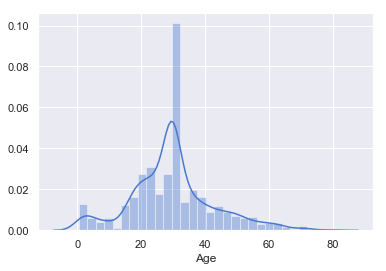

In [37]:
sns.set(style="darkgrid", palette="muted", color_codes=True)    
sns.distplot(df[df['Age'].notnull()]['Age'])

In [38]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Age'].isnull().sum()

0

In [39]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,1
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,0


### 训练模型

In [40]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, 1:]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [41]:
from sklearn.tree import DecisionTreeClassifier

决策树算法使用sklearn.tree模块中的DecisionTreeClassifier方法；

该方法有一系列参数来控制决策树生成过程，从而解决过拟合问题（具体可看sklearn的官方文档）；

常用的参数如下：

criterion：算法选择。一种是信息熵（entropy），一种是基尼系数（gini），默认为gini。

max_depth：指定数的最大深度。

min_samples_split：默认为2，指定能创建分支的数据集大小。

min_impurity_decrease：指定信息增益的阈值。


In [42]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
clf.score(X_test, y_test)

0.8268156424581006

### 交叉验证

In [46]:
from sklearn.model_selection import cross_val_score

result = cross_val_score(clf, X, y, cv=10)
#10折交叉验证
print(result.mean())

0.7869501191692203


### 优化参数

best param: 13; best score: 0.8324022346368715


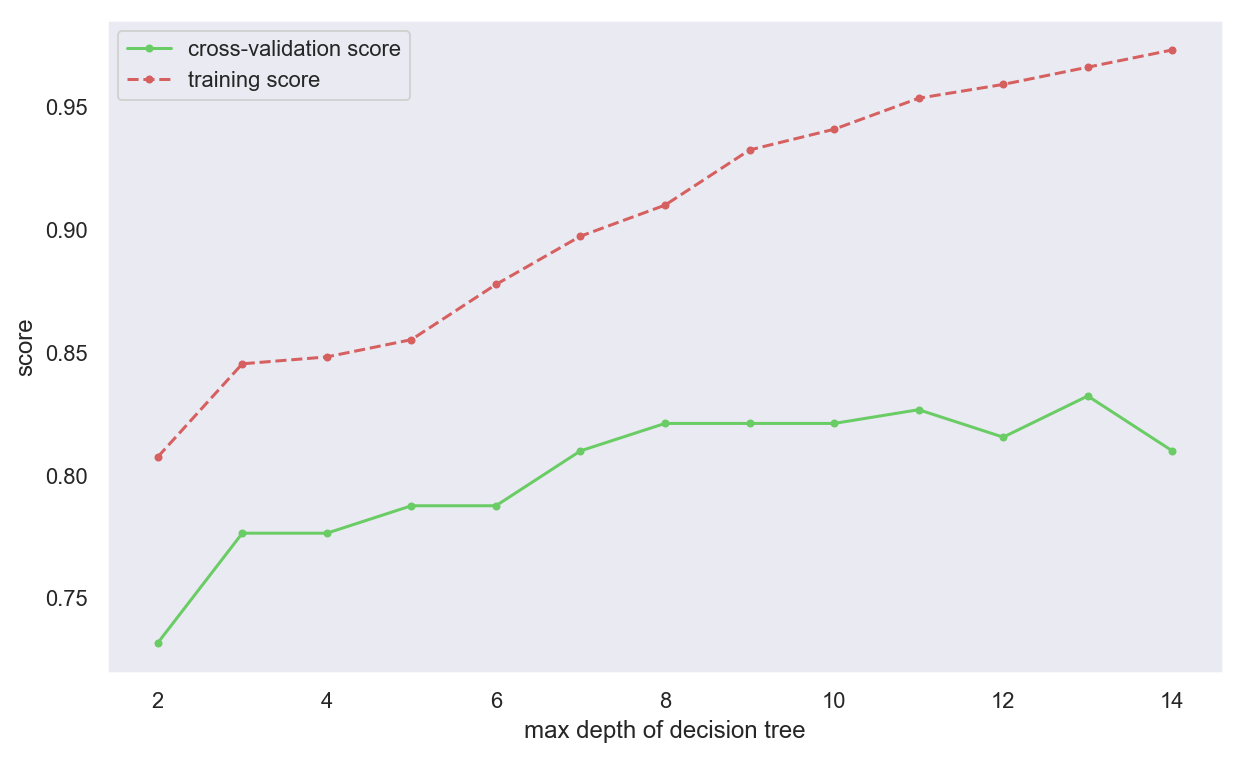

In [45]:
def cv_score(d):
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    tr_score = clf.score(X_train, y_train)
    cv_score = clf.score(X_test, y_test)
    return (tr_score, cv_score)

depths = range(2, 15)
scores = [cv_score(d) for d in depths]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_param = depths[best_score_index]
print('best param: {0}; best score: {1}'.format(best_param, best_score))

plt.figure(figsize=(10, 6), dpi=144)
plt.grid()
plt.xlabel('max depth of decision tree')
plt.ylabel('score')
plt.plot(depths, cv_scores, '.g-', label='cross-validation score')
plt.plot(depths, tr_scores, '.r--', label='training score')
plt.legend()

### gridsearchcv

In [60]:
from sklearn.model_selection import GridSearchCV
threshholds = np.linspace(0, 0.5, 50)
param_grid = {'min_impurity_decrease':threshholds}

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10)
clf.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_impurity_decrease': array([0.     , 0.0102 , 0.02041, 0.03061, 0.04082, 0.05102, 0.06122,
       0.07143, 0.08163, 0.09184, 0.10204, 0.11224, 0.12245, 0.13265,
       0.14286, 0.15306, 0.16327, 0.17347, 0.18367, 0.19388, 0.20408,
       0.21429, 0.22449, 0.23469, 0.2449 , 0.2551 , 0...16, 0.41837,
       0.42857, 0.43878, 0.44898, 0.45918, 0.46939, 0.47959, 0.4898 ,
       0.5    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [61]:
print("best param: {0}\nbest score: {1}".format(clf.best_params_, 
                                                clf.best_score_))

best param: {'min_impurity_decrease': 0.01020408163265306}
best score: 0.8125701459034792


In [62]:
print(clf.cv_results_)

{'mean_fit_time': array([0.00561366, 0.00392878, 0.00383911, 0.00285981, 0.00265765,
       0.00269108, 0.00290027, 0.00284519, 0.00277655, 0.0026798 ,
       0.0028733 , 0.00294547, 0.00309939, 0.00307322, 0.00290251,
       0.00319707, 0.00305812, 0.0038125 , 0.00372851, 0.00390682,
       0.00347614, 0.00322065, 0.00297675, 0.00286915, 0.00261254,
       0.00270326, 0.00273139, 0.00329261, 0.00314138, 0.00334961,
       0.0035753 , 0.00290723, 0.00290797, 0.00282943, 0.00262356,
       0.00254791, 0.00281489, 0.00294685, 0.00258446, 0.00265002,
       0.00293684, 0.00257118, 0.00275152, 0.00255284, 0.00292768,
       0.00271549, 0.00284784, 0.00309315, 0.00278103, 0.00275733]), 'std_fit_time': array([1.67681325e-03, 7.02186935e-04, 2.11896887e-03, 2.85959316e-04,
       3.86065869e-05, 4.09163793e-05, 3.83690497e-04, 3.38029727e-04,
       2.13067844e-04, 3.84742068e-05, 3.70418253e-04, 3.67536508e-04,
       3.86998623e-04, 4.15791598e-04, 3.63306953e-04, 5.76459850e-04,
       4.0

In [63]:
def plot_curve(train_sizes, cv_results, xlabel):
    train_scores_mean = cv_results['mean_train_score']
    train_scores_std = cv_results['std_train_score']
    test_scores_mean = cv_results['mean_test_score']
    test_scores_std = cv_results['std_test_score']
    plt.figure(figsize=(10, 6), dpi=144)
    plt.title('parameters turning')
    plt.xlabel(xlabel)
    plt.ylabel('score')
    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.1, color="r")
    plt.fill_between(train_sizes, 
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '.--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '.-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

/anaconda3/envs/Python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/envs/Python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


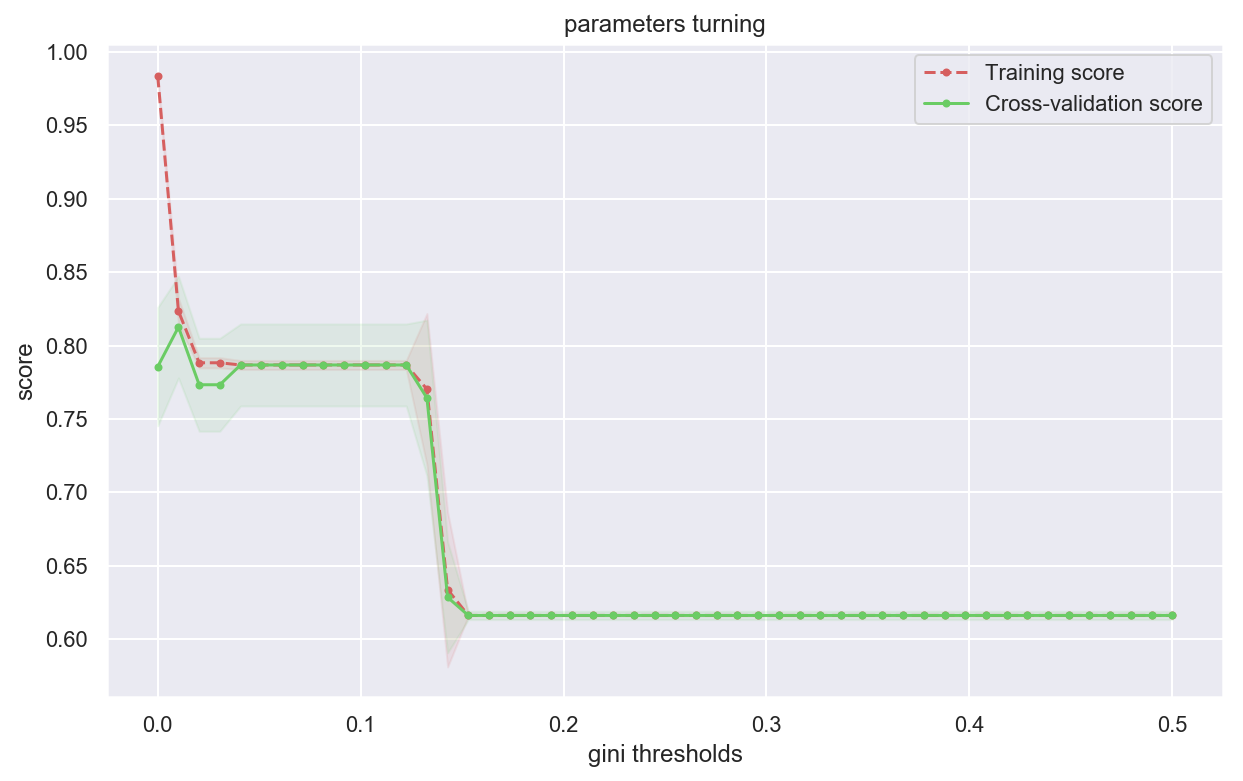

In [64]:
plot_curve(threshholds, clf.cv_results_, xlabel='gini thresholds')

In [65]:
threshholds = np.linspace(0, 0.5, 50)
param_grid = {'criterion':['gini', 'entropy'],
              'min_impurity_decrease':threshholds,
             'max_depth':range(2, 15)}

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10)
clf.fit(X, y)

/anaconda3/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'min_impurity_decrease': array([0.     , 0.0102 , 0.02041, 0.03061, 0.04082, 0.05102, 0.06122,
       0.07143, 0.08163, 0.09184, 0.10204, 0.11224, 0.12245, 0.13265,
       0.14286, 0.15306, 0.16327, 0.17347, 0.18367, 0.19388, 0.20408,
       0.21429, 0.2..., 0.43878, 0.44898, 0.45918, 0.46939, 0.47959, 0.4898 ,
       0.5    ]), 'max_depth': range(2, 15)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [66]:
print("best param: {0}\nbest score: {1}".format(clf.best_params_, 
                                                clf.best_score_))

best param: {'criterion': 'entropy', 'max_depth': 7, 'min_impurity_decrease': 0.0}
best score: 0.8237934904601572
